In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

In [ ]:
df=pd.read_excel(xl,sheet_name='01')

xl=pd.ExcelFile("tableaux-4001-ts.xlsx")

 
for sheetName in (xl.sheet_names[3:]):
    df=pd.read_excel(xl,sheet_name=sheetName)
    try :
        df_annee=df
        for i in range(23):
            columns=[]
            columns=df.columns[2+i*12:14+i*12]
            #print(columns)
            columns.append(df.columns[0:2])
            #print(columns)
            #df_annee=df[columns]
            column_name="sum"+str(2018-i)
            df_annee[column_name]=df_annee[df.columns[2+i*12:14+i*12]].sum(axis=1)
            #dept=df.merge(df_annee[['Index',column_name]])
        transpose=df_annee[df_annee.columns[-23:].append(df_annee.columns[0:2])]
        df_dept=transpose.set_index('libellé index').T
        df_dept['dept']=sheetName
        df_final=pd.concat([df_final,df_dept],axis=0)
    except Exception:
        traceback.print_exc()
        
writer = pd.ExcelWriter('dept_crimi.xlsx')
df_final.to_excel(writer,'Sheet1')
writer.save()

# Analyzing the data

In [68]:
data=pd.read_excel('dept_crimi.xlsx',sheet_name='Sheet1')
data.head(5)

,dept,annee,Règlements de compte entre malfaireurs,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,Tentatives d'homicides pour voler et à l'occasion de vols,Tentatives homicides pour d'autres motifs,Coups et blessures volontaires suivis de mort,Autres coups et blessures volontaires criminels ou correctionnels,Prises d'otages à l'occasion de vols,...,Index non utilisé.2,Index non utilisé.3,"Prix illicittes, publicité fausse et infractions aux règles de la concurrence",Achats et ventes sans factures,Infractions à l'exercice d'une profession règlementée,Infractions au droit de l'urbanisme et de la construction,Fraudes fiscales,Autres délits économiques et financiers,Autres délits,total
0,01,2018,0,0,4,1,10,2,1565,1,...,0,0,3,2,8,36,2,14,1062,26683
1,01,2017,0,0,7,0,12,1,1453,0,...,0,0,5,1,5,35,3,9,889,25335
2,01,2016,0,1,3,0,14,1,1431,2,...,0,0,3,1,14,34,1,12,870,25197
3,01,2015,0,0,4,0,7,2,1475,2,...,0,0,10,5,9,26,8,13,987,26296
4,01,2014,0,0,6,0,5,1,1424,0,...,0,0,9,8,19,26,4,14,904,25414


In [76]:
#getting total criminality of the last 20 years
total_criminality = data.groupby('dept').sum().reset_index()
total_criminality['dept']=total_criminality['dept'].astype(str)
total_criminality.head()

,dept,Règlements de compte entre malfaireurs,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,Tentatives d'homicides pour voler et à l'occasion de vols,Tentatives homicides pour d'autres motifs,Coups et blessures volontaires suivis de mort,Autres coups et blessures volontaires criminels ou correctionnels,Prises d'otages à l'occasion de vols,Prises d'otages dans un autre but,...,Index non utilisé.2,Index non utilisé.3,"Prix illicittes, publicité fausse et infractions aux règles de la concurrence",Achats et ventes sans factures,Infractions à l'exercice d'une profession règlementée,Infractions au droit de l'urbanisme et de la construction,Fraudes fiscales,Autres délits économiques et financiers,Autres délits,total
0,01,15,10,129,13,174,39,23238,20,16,...,99,100,237,212,270,609,170,505,15728,541570
1,02,16,11,150,19,182,50,35481,23,16,...,99,100,197,152,190,316,173,395,19559,580258
2,03,8,7,82,9,129,23,14050,9,15,...,99,100,213,203,263,355,157,412,9045,305529
3,04,7,4,58,6,61,15,7191,12,14,...,99,100,274,147,210,931,161,244,5021,179274
4,05,2,2,29,7,59,11,5813,9,9,...,99,100,196,129,174,677,123,205,4076,148891


## Getting geographical data

### Sources données géographiques :
- https://public.opendatasoft.com/explore/dataset/code-insee-postaux-geoflar/table/?flg=fr
- https://www.data.gouv.fr/fr/datasets/contours-des-departements-francais-issus-d-openstreetmap/
- https://www.data.gouv.fr/fr/datasets/correspondance-code-insee-code-postal/

In [8]:
import gdal
import geopandas
from shapely.geometry import Point


In [55]:
map_df = geopandas.read_file("departements-20180101.shp",encoding='utf-8')
map_df.head(5)

,code_insee,nom,nuts3,wikipedia,surf_km2,geometry
0,974,La Réunion,FR940,fr:La Réunion,2505.0,(POLYGON ((55.21642675688027 -21.0390353881033...
1,11,Aude,FR811,fr:Aude (département),6343.0,"POLYGON ((1.68871505484248 43.27367866077702, ..."
2,43,Haute-Loire,FR723,fr:Haute-Loire,5003.0,"POLYGON ((3.082060451005325 45.28987507143973,..."
3,13,Bouches-du-Rhône,FR823,fr:Bouches-du-Rhône,5247.0,"(POLYGON ((4.23013639969375 43.46047351660123,..."
4,47,Lot-et-Garonne,FR614,fr:Lot-et-Garonne,5385.0,POLYGON ((-0.1405839165134379 44.2264834087735...


code_insee    102
nom           102
nuts3         100
wikipedia     102
surf_km2      102
geometry      102
dtype: int64


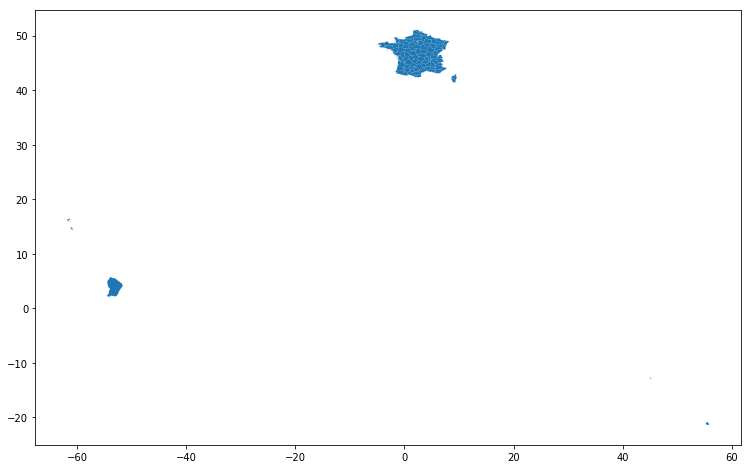

In [97]:
print(map_df.count())
map_df.plot()

## Merge the criminality data and the geographical data

In [119]:
merged_map = pd.merge(map_df,total_criminality, how='left', left_on = 'code_insee', right_on = 'dept')
merged_map=merged_map[~merged_map['code_insee'].isin(['971','972','973','974','976'])]
merged_map=merged_map.dropna()
merged_map.head(-1)


,code_insee,nom,nuts3,wikipedia,surf_km2,geometry,dept,Règlements de compte entre malfaireurs,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,...,Index non utilisé.2,Index non utilisé.3,"Prix illicittes, publicité fausse et infractions aux règles de la concurrence",Achats et ventes sans factures,Infractions à l'exercice d'une profession règlementée,Infractions au droit de l'urbanisme et de la construction,Fraudes fiscales,Autres délits économiques et financiers,Autres délits,total
1,11,Aude,FR811,fr:Aude (département),6343.0,"POLYGON ((1.68871505484248 43.27367866077702, ...",11,15.0,8.0,139.0,...,99.0,100.0,251.0,245.0,251.0,834.0,212.0,576.0,11805.0,464940.0
2,43,Haute-Loire,FR723,fr:Haute-Loire,5003.0,"POLYGON ((3.082060451005325 45.28987507143973,...",43,1.0,4.0,44.0,...,99.0,100.0,183.0,155.0,159.0,331.0,136.0,244.0,5529.0,150246.0
3,13,Bouches-du-Rhône,FR823,fr:Bouches-du-Rhône,5247.0,"(POLYGON ((4.23013639969375 43.46047351660123,...",13,367.0,62.0,856.0,...,99.0,100.0,438.0,306.0,976.0,3185.0,827.0,9290.0,91614.0,3966572.0
4,47,Lot-et-Garonne,FR614,fr:Lot-et-Garonne,5385.0,POLYGON ((-0.1405839165134379 44.2264834087735...,47,7.0,5.0,86.0,...,99.0,100.0,245.0,159.0,252.0,312.0,222.0,404.0,10281.0,315851.0
5,23,Creuse,FR632,fr:Creuse (département),5599.0,"POLYGON ((1.372541761655563 46.21671720881361,...",23,2.0,3.0,27.0,...,99.0,100.0,175.0,191.0,178.0,322.0,130.0,235.0,3412.0,73027.0
6,19,Corrèze,FR631,fr:Corrèze (département),5898.0,"POLYGON ((1.226960157890455 45.271776804169, 1...",19,6.0,2.0,45.0,...,99.0,100.0,219.0,226.0,273.0,384.0,140.0,267.0,7109.0,200180.0
7,15,Cantal,FR722,fr:Cantal (département),5774.0,"POLYGON ((2.062902806719234 44.97664246771834,...",15,1.0,4.0,21.0,...,99.0,100.0,199.0,170.0,169.0,319.0,134.0,208.0,2670.0,88049.0
8,91,Essonne,FR104,fr:Essonne (département),1819.0,"POLYGON ((1.914458182312108 48.46186418806208,...",91,19.0,16.0,252.0,...,99.0,100.0,311.0,164.0,387.0,1161.0,257.0,1039.0,41190.0,1715761.0
9,76,Seine-Maritime,FR232,fr:Seine-Maritime,6329.0,POLYGON ((0.06577015352681075 49.5126898889415...,76,13.0,23.0,290.0,...,99.0,100.0,310.0,178.0,371.0,347.0,270.0,617.0,42733.0,1608780.0
10,38,Isère,FR714,fr:Isère (département),7878.0,"POLYGON ((4.741572803097063 45.41589387516066,...",38,76.0,28.0,310.0,...,99.0,100.0,353.0,221.0,502.0,1094.0,330.0,926.0,38795.0,1613046.0


In [120]:
type(merged_map)

geopandas.geodataframe.GeoDataFrame

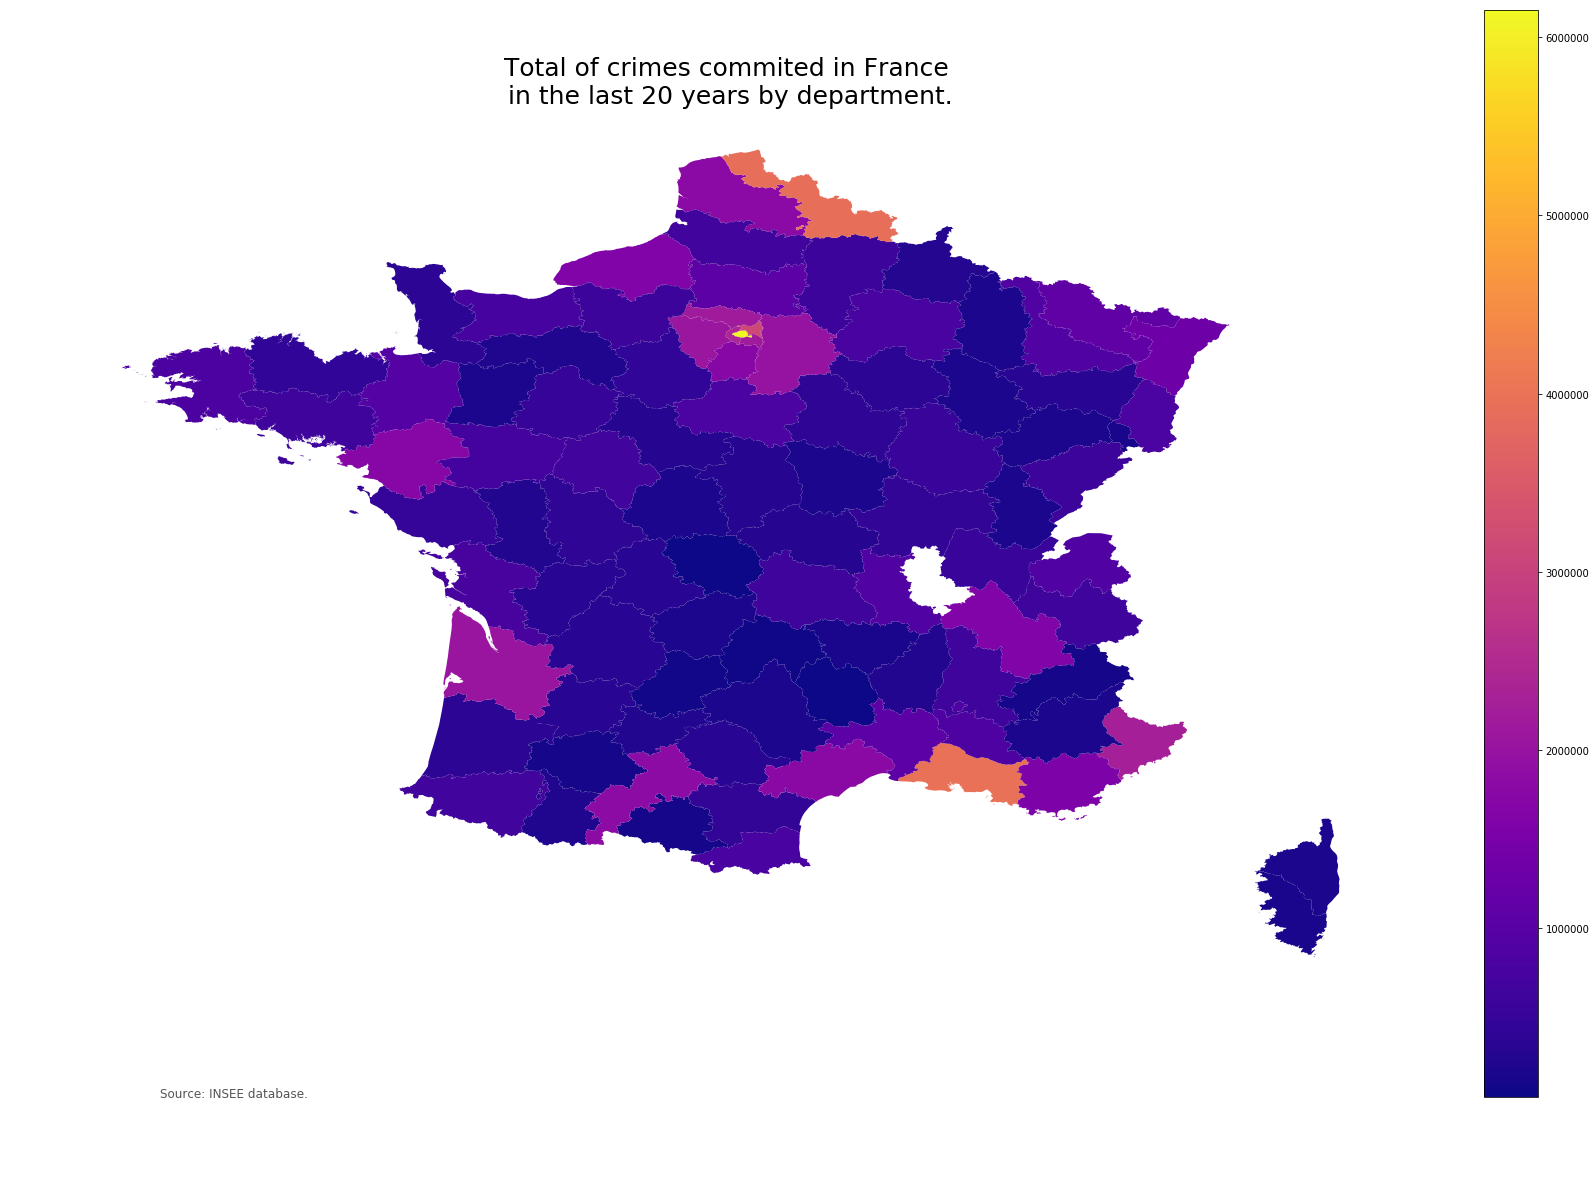

In [122]:
fig, ax = plt.subplots(1, figsize=(30, 20))
vmin, vmax = merged_map["total"].max(), merged_map["total"].min()

merged_map.plot(column="total", cmap="plasma", linewidth=0.8, ax=ax)
ax.axis("off")
ax.set_title("Total of crimes commited in France \nin the last 20 years by department.", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate('Source: INSEE database.',xy=(0.1, .08),  xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')


sm = plt.cm.ScalarMappable(cmap="plasma", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

            
fig.savefig("criminality_map_export.png", dpi=300)